### Loading the Data

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# for encoding
from sklearn.preprocessing import LabelEncoder

# for traing and test splitting
from sklearn.model_selection import train_test_split

# for checking testing resutls
from sklearn.metrics import classification_report, confusion_matrix

# for decision tree object
from sklearn.tree import DecisionTreeClassifier

# for visualizing tree
from sklearn.tree import plot_tree

In [2]:
stroke_data = pd.read_csv('datasets\stroke prediction.csv')


In [3]:
stroke_data.head(3)

,id,gender,age,hypertension,heart_disease,ever_married,work_type,Residence_type,avg_glucose_level,bmi,smoking_status,stroke
0,30669,Male,3.0,0,0,No,children,Rural,95.12,18.0,NaN,0
1,30468,Male,58.0,1,0,Yes,Private,Urban,87.96,39.2,never smoked,0
2,16523,Female,8.0,0,0,No,Private,Urban,110.89,17.6,NaN,0


In [4]:
stroke_data.columns

Index(['id', 'gender', 'age', 'hypertension', 'heart_disease', 'ever_married',
       'work_type', 'Residence_type', 'avg_glucose_level', 'bmi',
       'smoking_status', 'stroke'],
      dtype='object')

In [6]:
stroke_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 43400 entries, 0 to 43399
Data columns (total 12 columns):
 #   Column             Non-Null Count  Dtype  
---  ------             --------------  -----  
 0   id                 43400 non-null  int64  
 1   gender             43400 non-null  object 
 2   age                43400 non-null  float64
 3   hypertension       43400 non-null  int64  
 4   heart_disease      43400 non-null  int64  
 5   ever_married       43400 non-null  object 
 6   work_type          43400 non-null  object 
 7   Residence_type     43400 non-null  object 
 8   avg_glucose_level  43400 non-null  float64
 9   bmi                41938 non-null  float64
 10  smoking_status     30108 non-null  object 
 11  stroke             43400 non-null  int64  
dtypes: float64(3), int64(4), object(5)
memory usage: 4.0+ MB


### Creating Bins

In [7]:
bins=[0,12,19,30,60,90]
group=['child','teenager','young_adult','middle_aged', 'senior_citizen']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [8]:
stroke_data[['age', 'age_category']].head()

,age,age_category
0,3.0,child
1,58.0,middle_aged
2,8.0,child
3,70.0,senior_citizen
4,14.0,teenager


## Binning Using Decision Tree Split

<img src = "index.png" width=600px>

In [29]:
stroke_data.isnull().sum()

id                   0
gender               0
age                  0
hypertension         0
heart_disease        0
ever_married         0
work_type            0
Residence_type       0
avg_glucose_level    0
bmi                  0
smoking_status       0
stroke               0
age_category         0
dtype: int64

In [22]:
stroke_data['smoking_status'].value_counts()

never smoked       16053
formerly smoked     7493
smokes              6562
Name: smoking_status, dtype: int64

In [23]:
# replaced na with high category
stroke_data["smoking_status"].fillna("never smoked", inplace = True)
stroke_data['bmi'].fillna(stroke_data['bmi'].mean(),inplace= True)

In [30]:
stroke_data.isnull().any()

id                   False
gender               False
age                  False
hypertension         False
heart_disease        False
ever_married         False
work_type            False
Residence_type       False
avg_glucose_level    False
bmi                  False
smoking_status       False
stroke               False
age_category         False
dtype: bool

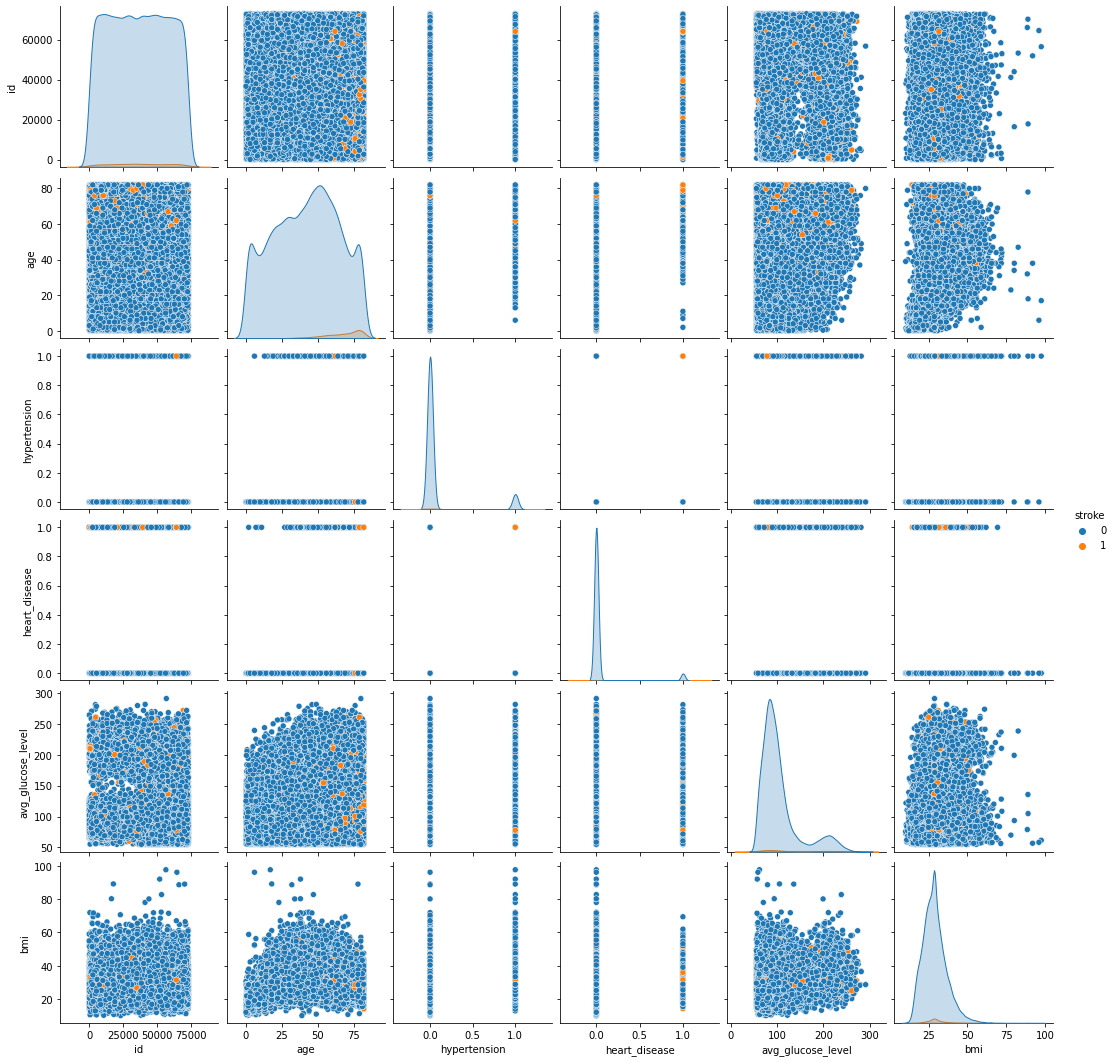

In [32]:
sns.pairplot(data = stroke_data ,hue = 'stroke')

<AxesSubplot:>

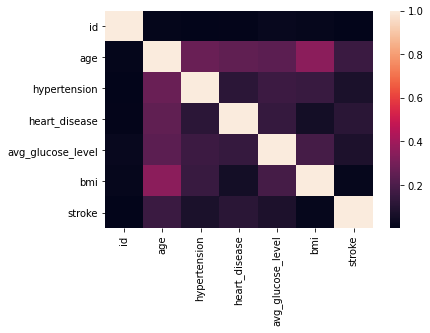

In [33]:
sns.heatmap(stroke_data.corr())

In [35]:
target = stroke_data['stroke']
df1 = stroke_data.copy()
df1 = df1.drop('stroke', axis =1)
df1.shape

(43400, 12)

In [36]:
X = df1

In [43]:
target

0        0
1        0
2        0
3        0
4        0
        ..
43395    0
43396    0
43397    0
43398    0
43399    0
Name: stroke, Length: 43400, dtype: int64

In [ ]:
bins=[0,49.5,66.5,77.5,90]
group=['Bin_1','Bin_2','Bin_3','Bin_4']
stroke_data['age_category']=pd.cut(stroke_data['age'], bins, labels=group)

In [ ]:
stroke_data[['age', 'age_category']].head()